# Transfer learning & fine-tuning

**Author:** Phillip Lee, Caleb Kim, Kshitij Kulshrestha<br>
**Date created:** 2024/04/06<br>
**Last modified:** 2024/04/26<br>
**Description:** Complete guide to transfer learning & fine-tuning using ResNet18.


## Setup

In [ ]:
!pip install keras
!pip install tensorflow
!pip install pandas
!pip install Pillow

In [ ]:
from google.colab import drive
import os
import pandas as pd


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Convert two json files into output csvs for model to create dataframes.

(Include files "test_set_task3.json" & "training_set_task3.json" into the Google Colab directly)


In [ ]:
import json
import csv
import io
from sklearn.preprocessing import LabelEncoder
from google.colab import files


def convert_json_to_csv(json_files, csv_file):
    data = []
    for json_file in json_files:
        with open(json_file, 'r') as f:
            json_data = json.load(f)
            for entry in json_data:
              if 'labels' in entry and isinstance(entry['labels'], list):
                entry['labels'] = ', '.join(entry['labels'])
              data.append(entry)

    with open(csv_file, 'w', newline='', encoding='utf-8') as f:
        if data:
            fieldnames = data[0].keys()  # Dynamically determine fieldnames from data
            writer = csv.DictWriter(f, fieldnames=fieldnames)
            writer.writeheader()
            for item in data:
                writer.writerow(item)

json_train_files = ['training_set_task3.json']
json_test_files = ['test_set_task3.json']
output_train_csv_file = '/content/output_train.csv'
output_test_csv_file = '/content/output_test.csv'
convert_json_to_csv(json_train_files, output_train_csv_file)
convert_json_to_csv(json_test_files, output_test_csv_file)
train_df = pd.read_csv(output_train_csv_file)
test_df = pd.read_csv(output_test_csv_file)
print(train_df.head())
print(test_df.head())

    id                                             labels  \
0  128  Black-and-white Fallacy/Dictatorship, Name cal...   
1  189             Reductio ad hitlerum, Smears, Transfer   
2   96  Appeal to fear/prejudice, Loaded Language, Nam...   
3  154  Causal Oversimplification, Glittering generali...   
4   15  Flag-waving, Misrepresentation of Someone's Po...   

                                                text          image  
0    THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n  128_image.png  
1                           This is not an accident!  189_image.png  
2  SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...   96_image.png  
3  PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...  154_image.png  
4  WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n   15_image.png  
            id                                             labels  \
0  705_batch_2   Name calling/Labeling, Slogans, Smears, Transfer   
1  706_batch_2  Appeal to (Strong) Emotions, Appeal to fear/pr...   
2  710

In [ ]:
train_df

,id,labels,text,image
0,128,"Black-and-white Fallacy/Dictatorship, Name cal...",THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n,128_image.png
1,189,"Reductio ad hitlerum, Smears, Transfer",This is not an accident!,189_image.png
2,96,"Appeal to fear/prejudice, Loaded Language, Nam...",SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,96_image.png
3,154,"Causal Oversimplification, Glittering generali...",PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,154_image.png
4,15,"Flag-waving, Misrepresentation of Someone's Po...",WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n,15_image.png
...,...,...,...,...
682,501_batch_2,Smears,"HOW TO KILL THE CORONOVIRUS...\nHey Hillary, I...",501_image_batch_2.png
683,508_batch_2,Smears,"LOOK, WHEN I'M IN THE WAFFLE HOUSE, I'M GOING ...",508_image_batch_2.png
684,509_batch_2,"Loaded Language, Name calling/Labeling, Smears",I support MLB\n\nIt's BLM you idiot,509_image_batch_2.png
685,510_batch_2,"Loaded Language, Smears","PELOSI ENDORSES BIDEN\n""He is a leader who is ...",510_image_batch_2.png


In [ ]:
train_df['labels'].value_counts()

labels
Smears                                                                                                                         82
Loaded Language, Name calling/Labeling, Smears                                                                                 67
Loaded Language, Smears                                                                                                        51
Name calling/Labeling, Smears                                                                                                  32
Loaded Language                                                                                                                20
                                                                                                                               ..
Smears, Thought-terminating cliché                                                                                              1
Loaded Language, Misrepresentation of Someone's Position (Straw Man), Name calling/

In [ ]:
test_df

,id,labels,text,image
0,705_batch_2,"Name calling/Labeling, Slogans, Smears, Transfer",The Democrats New America\n,705_image_batch_2.png
1,706_batch_2,"Appeal to (Strong) Emotions, Appeal to fear/pr...",WE ARE AT WAR!\n\nThere is a complex assault o...,706_image_batch_2.png
2,710_batch_2,"Doubt, Loaded Language, Name calling/Labeling",KILLED HIMSELF IN PRISON\n\nWON AN HONEST ELEC...,710_image_batch_2.png
3,713_batch_2,"Exaggeration/Minimisation, Loaded Language",I will never concede!\n\nNO WAY IN HELL BIDEN ...,713_image_batch_2.png
4,715_batch_2,Doubt,TRYING TO FIGURE OUT HOW BIDEN WON A RECORD LO...,715_image_batch_2.png
...,...,...,...,...
195,761_batch_2,Smears,"Hi Joe, it's me...Cornpop\n",761_image_batch_2.png
196,762_batch_2,Loaded Language,HE'S MAKING HIS LIST\n\nHE'S CHECKING IT TWICE...,762_image_batch_2.png
197,764_batch_2,"Loaded Language, Smears",PA WHAT'S IRONY MEAN?\n\nIRONY IS WHEN THE LIB...,764_image_batch_2.png
198,768_batch_2,Smears,Girlfriend Keeps Referring To Herself As 'Wife...,768_image_batch_2.png


In [ ]:
test_df['labels'].value_counts()

labels
Doubt, Loaded Language                                                                  9
Doubt                                                                                   9
Smears                                                                                  9
Exaggeration/Minimisation, Smears                                                       8
Loaded Language, Name calling/Labeling, Smears                                          6
                                                                                       ..
Appeal to (Strong) Emotions, Repetition, Slogans, Transfer                              1
Glittering generalities (Virtue), Loaded Language, Name calling/Labeling                1
Exaggeration/Minimisation, Glittering generalities (Virtue), Transfer                   1
Doubt, Glittering generalities (Virtue), Loaded Language, Thought-terminating cliché    1
Name calling/Labeling, Smears                                                           1
Nam

Create a dictionary that contains lists of all of the labels then remove their values

In [ ]:
train_dictionary = {}
for l in train_df['labels']:
  l = str(l)
  string = l.split(', ')
  # Obfuscation, Intentional vagueness, Confusion
  for s in string:
    if (s == "Intentional vagueness" or s == "Obfuscation" or s == "Confusion" ):
      train_dictionary[s] = train_dictionary.get("Obfuscation, Intentional vagueness, Confusion", 0) + 1
    else:
      train_dictionary[s] = train_dictionary.get(s, 0) + 1

In [ ]:
test_dictionary = {}
for l in test_df['labels']:
  l = str(l)
  string = l.split(', ')
  for s in string:
    test_dictionary[s] = test_dictionary.get(s, 0) + 1

Print a list of names of unique labels.

In [ ]:
y_train_actual = list(train_dictionary.keys())
print(y_train_actual)

['Black-and-white Fallacy/Dictatorship', 'Name calling/Labeling', 'Smears', 'Reductio ad hitlerum', 'Transfer', 'Appeal to fear/prejudice', 'Loaded Language', 'Slogans', 'Causal Oversimplification', 'Glittering generalities (Virtue)', 'Flag-waving', "Misrepresentation of Someone's Position (Straw Man)", 'Exaggeration/Minimisation', 'Repetition', 'Appeal to (Strong) Emotions', 'Doubt', 'Obfuscation', 'Intentional vagueness', 'Confusion', 'Whataboutism', 'Thought-terminating cliché', 'Presenting Irrelevant Data (Red Herring)', 'Appeal to authority', 'Bandwagon', 'nan']


In [ ]:
y_train_actual

['Black-and-white Fallacy/Dictatorship',
 'Name calling/Labeling',
 'Smears',
 'Reductio ad hitlerum',
 'Transfer',
 'Appeal to fear/prejudice',
 'Loaded Language',
 'Slogans',
 'Causal Oversimplification',
 'Glittering generalities (Virtue)',
 'Flag-waving',
 "Misrepresentation of Someone's Position (Straw Man)",
 'Exaggeration/Minimisation',
 'Repetition',
 'Appeal to (Strong) Emotions',
 'Doubt',
 'Obfuscation',
 'Intentional vagueness',
 'Confusion',
 'Whataboutism',
 'Thought-terminating cliché',
 'Presenting Irrelevant Data (Red Herring)',
 'Appeal to authority',
 'Bandwagon',
 'nan']

In [ ]:
y_test_actual = list(train_dictionary.keys())
print(y_test_actual)

['Black-and-white Fallacy/Dictatorship', 'Name calling/Labeling', 'Smears', 'Reductio ad hitlerum', 'Transfer', 'Appeal to fear/prejudice', 'Loaded Language', 'Slogans', 'Causal Oversimplification', 'Glittering generalities (Virtue)', 'Flag-waving', "Misrepresentation of Someone's Position (Straw Man)", 'Exaggeration/Minimisation', 'Repetition', 'Appeal to (Strong) Emotions', 'Doubt', 'Obfuscation', 'Intentional vagueness', 'Confusion', 'Whataboutism', 'Thought-terminating cliché', 'Presenting Irrelevant Data (Red Herring)', 'Appeal to authority', 'Bandwagon', 'nan']


Begin preprocessing labels.

In [ ]:
for i, l in enumerate(train_df['labels']):
  l = str(l)
  if l == 'nan':
    train_df.loc[i, 'labels'] = 'nan'

In [ ]:
for i, l in enumerate(test_df['labels']):
  l = str(l)
  if l == 'nan':
    test_df.loc[i, 'labels'] = 'nan'

In [ ]:
npy_y_train = []
for l in train_df['labels']:
  l = str(l)
  arr = [0] * 24
  if l == 'nan':
    npy_y_train.append(arr)
    continue
  string = l.split(', ')
  for s in string:
    x = y_train_actual.index(s)
    arr[x] = 1
  npy_y_train.append(arr)

In [ ]:
npy_y_test = []
for l in test_df['labels']:
  l = str(l)
  arr = [0] * 24
  if l == 'nan':
    npy_y_test.append(arr)
    continue
  string = l.split(', ')
  for s in string:
    x = y_test_actual.index(s)
    arr[x] = 1
  npy_y_test.append(arr)

In [ ]:
len(npy_y_train)

687

In [ ]:
len(npy_y_test)

200

In [ ]:
import numpy as np

np.save('train_labels.npy', npy_y_train)
np.save('test_labels.npy', npy_y_test)

In [ ]:
train_dictionary

{'Black-and-white Fallacy/Dictatorship': 19,
 'Name calling/Labeling': 252,
 'Smears': 450,
 'Reductio ad hitlerum': 15,
 'Transfer': 61,
 'Appeal to fear/prejudice': 66,
 'Loaded Language': 360,
 'Slogans': 45,
 'Causal Oversimplification': 31,
 'Glittering generalities (Virtue)': 84,
 'Flag-waving': 36,
 "Misrepresentation of Someone's Position (Straw Man)": 32,
 'Exaggeration/Minimisation': 60,
 'Repetition': 10,
 'Appeal to (Strong) Emotions': 68,
 'Doubt': 61,
 'Obfuscation': 1,
 'Intentional vagueness': 1,
 'Confusion': 1,
 'Whataboutism': 47,
 'Thought-terminating cliché': 20,
 'Presenting Irrelevant Data (Red Herring)': 2,
 'Appeal to authority': 19,
 'Bandwagon': 2,
 'nan': 29}

In [ ]:
test_dictionary

{'Name calling/Labeling': 65,
 'Slogans': 22,
 'Smears': 105,
 'Transfer': 23,
 'Appeal to (Strong) Emotions': 19,
 'Appeal to fear/prejudice': 18,
 'Loaded Language': 100,
 'Doubt': 41,
 'Exaggeration/Minimisation': 31,
 'Whataboutism': 14,
 'Reductio ad hitlerum': 7,
 'Obfuscation': 2,
 'Intentional vagueness': 2,
 'Confusion': 2,
 'Glittering generalities (Virtue)': 24,
 'Black-and-white Fallacy/Dictatorship': 7,
 'Flag-waving': 12,
 'Presenting Irrelevant Data (Red Herring)': 5,
 'Appeal to authority': 13,
 'Thought-terminating cliché': 6,
 'Repetition': 1,
 "Misrepresentation of Someone's Position (Straw Man)": 3,
 'Causal Oversimplification': 4,
 'Bandwagon': 1,
 'nan': 4}

In [ ]:
len(train_dictionary)

25

In [ ]:
len(test_dictionary)

25

Length of total number of unique labels.

Length of total amount of images inside of the dataframe.

In [ ]:
len(train_df)

687

In [ ]:
len(test_df)

200

In [ ]:
train_dictionary = {}
for l in train_df['labels']:
  l = str(l)
  string = l.split(', ')
  for s in string:
    train_dictionary[s] = train_dictionary.get(s, 0) + 1

In [ ]:
test_dictionary = {}
for l in test_df['labels']:
  l = str(l)
  string = l.split(', ')
  for s in string:
    test_dictionary[s] = test_dictionary.get(s, 0) + 1

In [ ]:
hello = []
whole_dir = '/content/drive/MyDrive/training_set_task3'
for im in train_df['image']:
  if str(im) == 'nan':
    print('nan')
  hello.append(f'{whole_dir}/{im}')

In [ ]:
bye = []
whole_dir = '/content/drive/MyDrive/test_set_task3'
for im in test_df['image']:
  if str(im) == 'nan':
    print('nan')
  bye.append(f'{whole_dir}/{im}')

In [ ]:
len(hello)

687

In [ ]:
len(bye)

200

Begin preprocessing images.

Resize all images to become the same size and store the pixels into npy file.

In [ ]:
from PIL import Image
import numpy as np

X = []
for h in hello:
  img = Image.open(h)
  img = img.resize((256, 256))
  num_arr = np.array(img).tolist()
  X.append(num_arr)

Y = []
for  b in bye:
  img = Image.open(h)
  img = img.resize((256, 256))
  num_arr = np.array(img).tolist()
  Y.append(num_arr)

In [ ]:
len(X)

687

In [ ]:
len(Y)

200

After the images are converted into pixels, same the npy file for both testing and training files.

In [ ]:
np.save('train_img.npy', X)
np.save('test_img.npy', Y)

Begin transfer learning using ResNet18.

> Add blockquote



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision.models import resnet18, ResNet18_Weights

from torch.optim import Adam, AdamW

import numpy as np
import os

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

(Requested files should already be in the Colab)

In [ ]:
X_train = np.load('train_img.npy')
X_test = np.load('test_img.npy')
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train /= 255.0
X_test /= 255.0

y_train = np.load('train_labels.npy')
y_test = np.load('test_labels.npy')

In [ ]:
class Data(Dataset):
    def __init__(self, images, labels):
        self.length = len(labels)
        self.images = images
        self.labels = labels

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx])
        label = torch.from_numpy(self.labels[idx])

        return image, label

In [ ]:
pin_memory = True if device == 'cuda' else False

train = Data(X_train, y_train)
test = Data(X_test, y_test)

train_dataloader = DataLoader(
    train,
    batch_size=4,
    shuffle=True,
    num_workers=1,
    pin_memory=pin_memory
)

test_dataloader = DataLoader(
    test,
    batch_size=4,
    shuffle=False,
    num_workers=1,
    pin_memory=pin_memory
)

In [ ]:
class TransferLearn(nn.Module):
    def __init__(self):
        super(TransferLearn, self).__init__()

        resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
        res = list(resnet.children())[:-1]
        self.res = nn.Sequential(*res)
        self.linear = nn.Linear(512, 24)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.permute(x, (0, 3, 1, 2))
        x = self.res(x)
        #print(x.shape)
        x = torch.squeeze(x)
        x = self.linear(x)
        #print(x.shape, "hello")
        x = self.sigmoid(x)

        return x

In [ ]:
model = TransferLearn().to(device)
#print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 128MB/s]


In [ ]:
EPOCHS = 3

# Binary Cross Entropy since it's a binary array as output
loss_function = nn.BCELoss()
optimizer = Adam(model.parameters())

In [ ]:
for epoch in range(EPOCHS):
    train_loss_sum = 0
    model.train()

    # Training loop
    for i, (x_actual, y_actual) in enumerate(train_dataloader, 1):
        optimizer.zero_grad()
        x_actual, y_actual = x_actual.to(device), y_actual.type(torch.float32).to(device)
        y_pred = model(x_actual)
        loss = loss_function(y_pred, y_actual)
        train_loss_sum += loss.item()
        loss.backward()
        optimizer.step()

    val_loss_sum = 0
    model.eval()

    # Check validation loss to see if it's overfitting
    with torch.no_grad():
        for j, (x_actual, y_actual) in enumerate(test_dataloader, 1):
            x_actual, y_actual = x_actual.to(device), y_actual.type(torch.float32).to(device)
            y_pred = model(x_actual)
            loss = loss_function(y_pred, y_actual)
            val_loss_sum += loss.item()


    if epoch % 1 == 0:
        avg_train_loss = round(train_loss_sum / i, 3)
        avg_val_loss = round(val_loss_sum / j, 3)

        print(f'Training Loss: {avg_train_loss}')
        print(f'Validation Loss: {avg_val_loss}\n')
        folder_path = f'model/checkpoint-{epoch}'
        os.makedirs(folder_path, exist_ok=True)
        torch.save(model.state_dict(), f'{folder_path}/resnet18.pth')


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training Loss: 0.265
Validation Loss: 0.286

Training Loss: 0.248
Validation Loss: 0.286

Training Loss: 0.249
Validation Loss: 0.277



Inference.

In [ ]:
class TransferLearn(nn.Module):
    def __init__(self):
        super(TransferLearn, self).__init__()

        resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
        res = list(resnet.children())[:-1]
        self.res = nn.Sequential(*res)
        self.linear = nn.Linear(512, 24)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.permute(x, (0, 3, 1, 2))
        x = self.res(x)
        #print(x.shape)
        x = torch.squeeze(x)
        x = self.linear(x)
        #print(x.shape, "hello")
        x = self.sigmoid(x)

        return x

In [ ]:
# Load model for inference
checkpoint = 'model/checkpoint-2/resnet18.pth'
res_inference = TransferLearn()
res_inference.load_state_dict(torch.load(checkpoint))

<All keys matched successfully>

In [ ]:
X_train = np.load('train_img.npy')
X_test = np.load('test_img.npy')
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train /= 255.0
X_test /= 255.0

y_train = np.load('train_labels.npy')
y_test = np.load('test_labels.npy')

In [ ]:
class Data(Dataset):
    def __init__(self, images, labels):
        self.length = len(labels)
        self.images = images
        self.labels = labels

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx])
        label = torch.from_numpy(self.labels[idx])

        return image, label

In [ ]:
pin_memory = True if device == 'cuda' else False

test = Data(X_test, y_test)

test_dataloader = DataLoader(
    test,
    batch_size=1,
    shuffle=False,
    num_workers=1,
    pin_memory=pin_memory
)

In [ ]:
for i, (a, b) in enumerate(test_dataloader):
  print(a.shape, b.shape)
  break

torch.Size([1, 256, 256, 3]) torch.Size([1, 24])


In [ ]:
import torch
import torch.nn as nn

def find_metrics(test_dataloader):
    total_class = 0
    loss_sum = 0
    loss_function = nn.BCELoss()
    correct_count = 0
    class_correct = [0] * 24
    class_total = [0] * 24
    y_predict = []
    y_actually = []
    with torch.no_grad():
        for i, (x_actual, y_actual) in enumerate(test_dataloader, 1):
            x_actual, y_actual = x_actual.to(device), y_actual.type(torch.float32).to(device)
            y_pred = model(x_actual)
            y_pred = y_pred.view(-1, 24)
            # Apply threshold to convert probabilities to binary predictions for accuracy calculation
            y_pred_bin = (y_pred > 0.5).float()
            correct = (y_actual == y_pred_bin).sum().item()
            correct_count += correct
            total_class += y_actual.nelement()
            loss = loss_function(y_pred, y_actual)
            loss_sum += loss.item()

            y_predict.append(y_pred_bin.flatten().tolist())
            y_actually.append(y_actual.flatten().tolist())


    class_accuracy = [0] * 24
    for y_p, y_a in zip(y_predict, y_actually):
      for i in range(len(y_p)):
        #print(a, b)
        if y_p[i] == y_a[i]:
          class_accuracy[i] += 1


    for i in range(len(class_accuracy)):
      class_accuracy[i] /= len(test)

    #print(acc)

    avg_loss = loss_sum / len(test_dataloader)
    accuracy = correct_count / total_class
    return avg_loss, accuracy, class_accuracy

In [ ]:
avg_loss, accuracy, class_accuracy = find_metrics(test_dataloader)

print(f'Average Loss: {avg_loss}')
print(f'Accuracy: {accuracy}')
print(f'Class Accuracy: {class_accuracy}')

Average Loss: 0.27725404482334853
Accuracy: 0.8922916666666667
Class Accuracy: [0.965, 0.675, 0.525, 0.965, 0.885, 0.91, 0.5, 0.89, 0.98, 0.88, 0.94, 0.985, 0.845, 0.995, 0.905, 0.795, 0.99, 0.99, 0.99, 0.93, 0.97, 0.975, 0.935, 0.995]


Use matplotlib to create graphs off of given data.

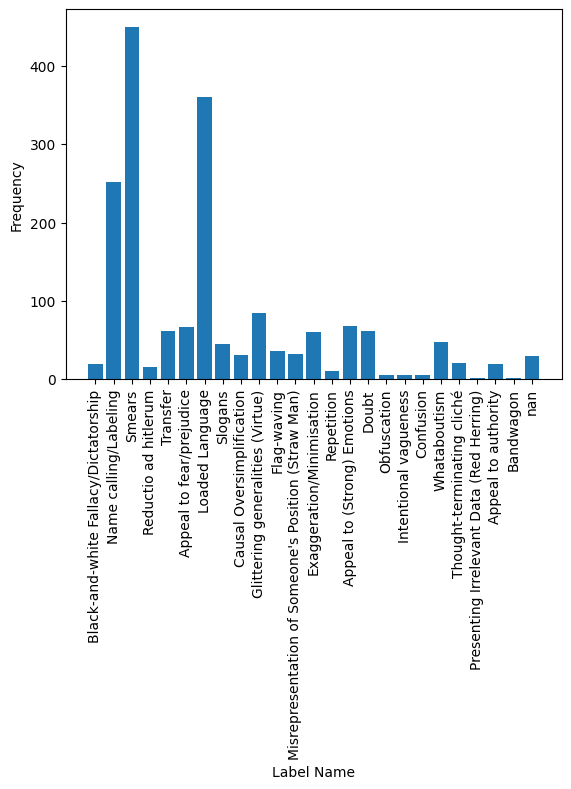

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(range(len(train_dictionary)), train_dictionary.values(), align= 'center')
plt.xticks(range(len(train_dictionary)), train_dictionary.keys(), rotation= 90)
plt.xlabel('Label Name')
plt.ylabel('Frequency')

plt.show()

